#Author: Astha Modi
#Task: Iris Flowers Classification ML Project 

##1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##2. Loading the Iris Dataset

In [2]:
data = pd.read_csv('Iris.csv',index_col='Id')
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


##3. EDA - Data Summarization

In [3]:
data.shape

(150, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Checking the number of rows that belong to each class

In [6]:
data['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

##4. Data Visualization

### A) Violin Plots



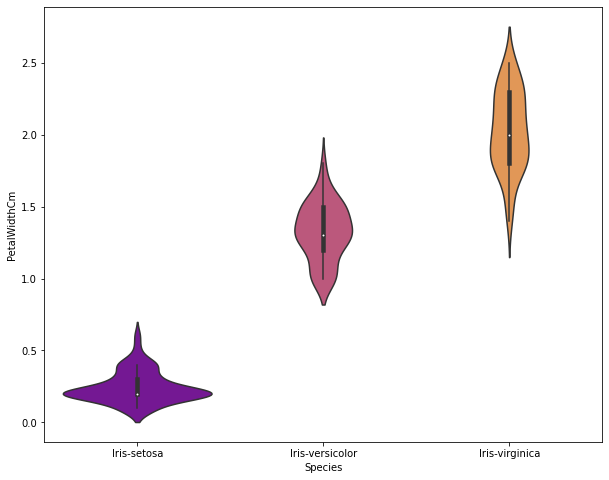

In [7]:
plt.figure(figsize=(10,8))
sns.violinplot(x='Species', y='PetalWidthCm',data=data ,palette='plasma')

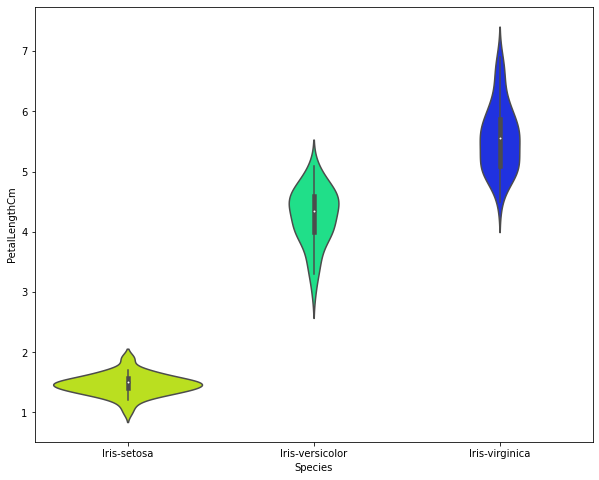

In [8]:
plt.figure(figsize=(10,8))
sns.violinplot(x='Species', y='PetalLengthCm',data=data ,palette='gist_rainbow')

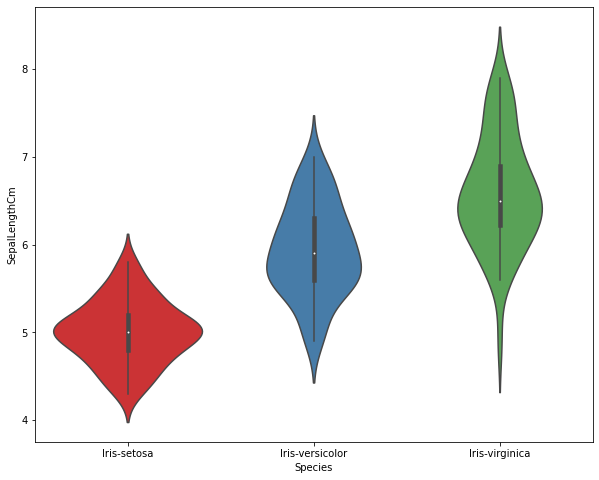

In [9]:
plt.figure(figsize=(10,8))
sns.violinplot(x='Species', y='SepalLengthCm', data=data, palette='Set1')

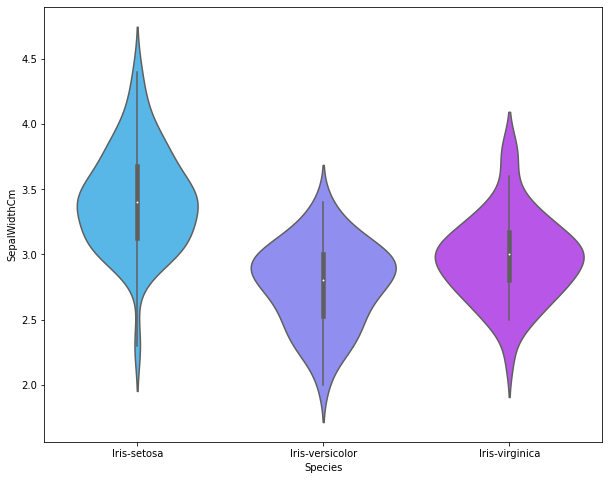

In [10]:
plt.figure(figsize=(10,8))
sns.violinplot(x='Species', y='SepalWidthCm', data=data, palette='cool')

### B) Pairplot

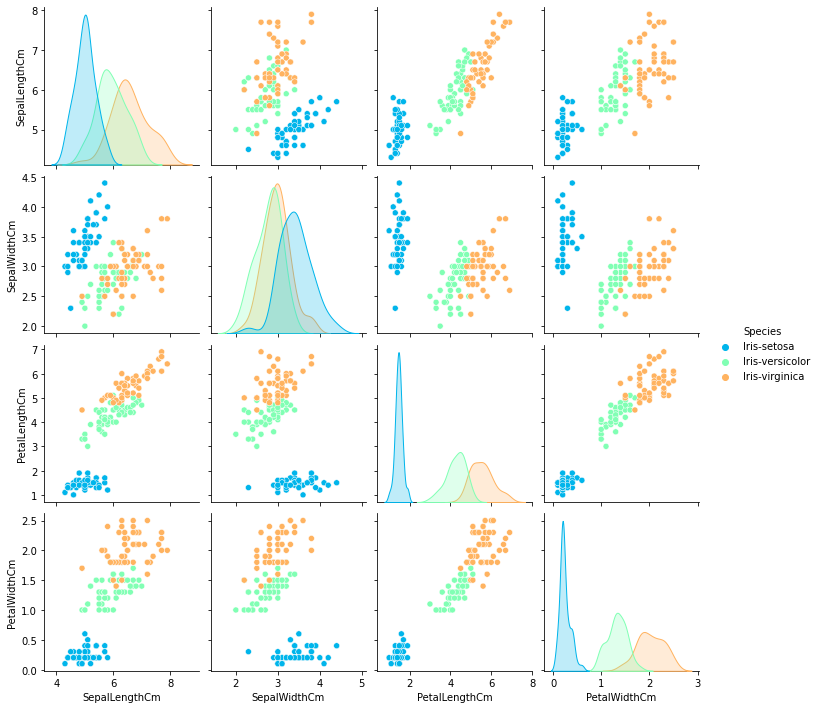

In [11]:
sns.pairplot(data, hue='Species', palette='rainbow');

### C) HeatMap

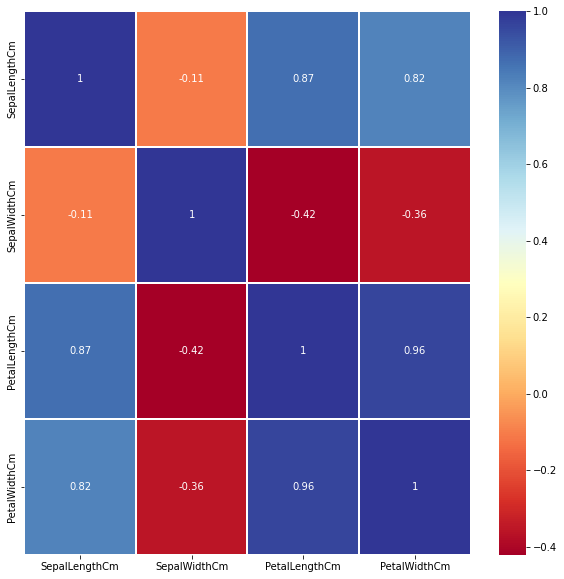

In [12]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap='RdYlBu', linecolor='white', linewidths=1, annot=True)

##5. Model Buliding

In [13]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [16]:
X = data.drop(['Species'], axis=1)
y = data['Species']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (150, 4) | y shape: (150,) 


In [17]:
iris = datasets.load_iris()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'],iris['target'], random_state=0)

In [19]:
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [24]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC()
nb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

##6. Evaluating the models

In [33]:
models = [lr, knn, svm, nb, dt, rf];
scores = [];
for model in models:
  model.fit(X_train, y_train);
  y_pred = model.predict(X_test);
  scores.append(accuracy_score(y_test, y_pred));
  print("Accuracy of " + type(model).__name__+" is",accuracy_score(y_test, y_pred));

Accuracy of LogisticRegression is 0.9736842105263158
Accuracy of KNeighborsClassifier is 0.9736842105263158
Accuracy of SVC is 0.9736842105263158
Accuracy of GaussianNB is 1.0
Accuracy of DecisionTreeClassifier is 0.9736842105263158
Accuracy of RandomForestClassifier is 0.9736842105263158


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [34]:
results = pd.DataFrame({
    'Models': ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 'Naive Bayes', 'Decision Tree', 'Random Forest'],
    'Accuracy': scores})

results = results.sort_values(by='Accuracy', ascending=False)
print(results)

                   Models  Accuracy
3             Naive Bayes  1.000000
0     Logistic Regression  0.973684
1     K-Nearest Neighbors  0.973684
2  Support Vector Machine  0.973684
4           Decision Tree  0.973684
5           Random Forest  0.973684
